In [74]:
from sklearn.model_selection import train_test_split
import numpy as np
import logistic_regression
import matplotlib.pyplot as plt
import pandas as pd

# Loading data
data = pd.read_csv("Data PCOS/data without infertility _final.csv")

# Create a data frame 
data = pd.DataFrame(data)
del data[data.columns[-1]] # Removing last column (error)

# Delete the identification columns
header_raw = list(data)
header_del_elements_1 = ['Sl. No', 'Patient File No.']
data_model_1 = data.copy()
data_model_1.drop(columns=header_del_elements_1, inplace=True)

# Convert to numpy array
data_model_1 = data_model_1.to_numpy()

y_1 = data_model_1[:, 0]
X_1 = data_model_1[:, 1:]

# Remove nan values from the data
y_1 = y_1[np.squeeze(~np.isnan(X_1).any(axis=1))]
X_1 = X_1[~np.isnan(X_1).any(axis=1)]


X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(
    X_1, y_1, test_size=0.30, random_state=0)



**Load the data and split into train and text.**


Now that the data is slited lets familiarized with our data

In [75]:
print('X_train shape:', X_train_1.shape)
print('y_train shape:', y_train_1.shape)
print('X_test shape:', X_test_1.shape)
print('y_test shape:', y_test_1.shape)

X_train shape: (376, 39)
y_train shape: (376,)
X_test shape: (162, 39)
y_test shape: (162,)


**Z-score normalization**

In [76]:
train_mean_1 = np.mean(X_train_1, axis=0)
train_std_1 = np.std(X_train_1, axis=0)
X_train_norm_1 = (X_train_1 - train_mean_1) / train_std_1

Check the results of the normalization

In [77]:
print('Peak to peak data')
print('Raw:', np.ptp(X_train_1, axis=0),'\n\n Normalized:', np.ptp(X_train_norm_1, axis=0))

Peak to peak data
Raw: [2.80000000e+01 7.60000000e+01 4.30000000e+01 2.48773391e+01
 7.00000000e+00 6.90000000e+01 1.20000000e+01 6.30000000e+00
 3.00000000e+00 1.20000000e+01 3.00000000e+01 1.00000000e+00
 5.00000000e+00 5.05179000e+03 2.01798000e+03 1.37282394e+03
 2.20000000e+01 2.00000000e+01 1.94190476e-01 2.58700000e+01
 6.59000000e+01 1.27840000e+02 9.00000000e+01 8.49530000e+01
 2.90000000e+02 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.28000000e+02 9.20000000e+01 2.20000000e+01 2.00000000e+01
 2.40000000e+01 2.38300000e+01 1.80000000e+01] 

 Normalized: [ 5.26029017  6.97781048  6.91331772  6.32415088  3.80751351 13.88255928
  6.92808072  7.24306135  3.32226292  8.12162599  6.27626298  2.07472158
  7.05909444 19.43335811 19.43810558 19.40361333  5.63132597  5.70837063
  4.18444081  9.00510738 10.93350903  9.50579781  7.28146389 18.63374089
 14.43610035  2.08119498  2.25611281  2.14524668  2.01141431  2.00002829
 

Lets apply the gradient descent in the data using all the parameter in the linear form

In [78]:
w_1, b_1, J_history_1, w_history_1 = logistic_regression.gradient_descent_reg(X_train_norm_1, y_train_1, np.zeros((39,)), 0, 0.2, 450, 1e-5 )

Iteration    0: Cost     0.60   
Iteration   45: Cost     0.22   
Iteration   90: Cost     0.18   
Iteration  135: Cost     0.17   
Iteration  180: Cost     0.16   
Iteration  225: Cost     0.16   
Iteration  270: Cost     0.15   
Iteration  315: Cost     0.15   
Iteration  360: Cost     0.15   
Iteration  405: Cost     0.15   
Iteration  449: Cost     0.15   


Vizualization of the cost function during the gradient descent computation

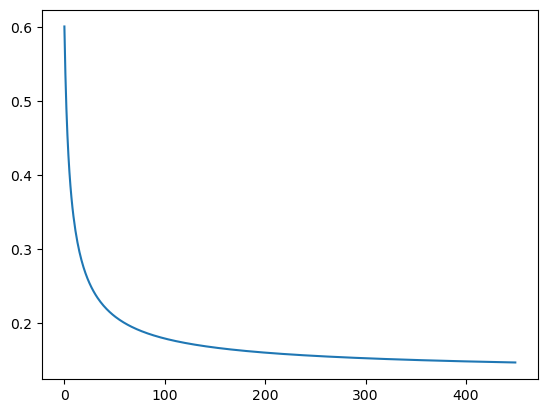

In [79]:
fig, ax = plt.subplots()
ax.plot(J_history_1)

Lets see the accurace of our prediction using this model.

Considering accurace the percentage of correct predictions

In [80]:
# Normalize the test data
X_test_norm_1 = (X_test_1 - train_mean_1) / train_std_1

# Compute the accurace
f_wb_1, g_1 = logistic_regression.predict(X_test_norm_1, w_1, b_1)
accurace_1 = np.mean(np.where(f_wb_1 == y_test_1, 1, 0))
print('Accurace before removing features:',round(accurace_1 ,3) * 100,'%')

Accurace before removing features: 84.0 %


**Positive predictive value(PPV)** is the probability that a person who test positive actually has the disease.
The PPV is a good measure of confiability of a test, lets calculate it for the model.

In [81]:
y_test_positive_1 = y_test_1[f_wb_1 == 1]
ppv_1 = np.mean(y_test_positive_1)
print('Positive predictive value:',round(ppv_1,3) * 100, '%')

Positive predictive value: 87.2 %


**Negative predictive value (NPV)** is the probability that a person who test negative actually not having the disease

In [101]:
y_test_negative_1 = y_test_1[f_wb_1 == 0]
npv_1 = np.mean(1 - y_test_negative_1)
print('Negative predictive value:',round(npv_1, 3) * 100, '%')

Negative predictive value: 82.6 %


**Linear model with all the parameter conclusion**

As shown above, the model using all the parameters and just linear components have a low accurace of just 0.44, lets study the parameter to increase the prediction accurace.

## Feature analysis for best fit
Lets see the features used in our prediction:

In [82]:
header = [element for element in header_raw if element not in header_del_elements_1]
print(header)

['PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)', 'Height(Cm) ', 'BMI', 'Blood Group', 'Pulse rate(bpm) ', 'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)', 'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of aborptions', 'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio', 'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)', 'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)', 'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)', 'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)', 'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)']


We can see that some of the data have clear no correlation with the study, so lets remove the following:
* Age (1)
* Pulse rate (7)
* RR
* Marraige Status

Data remove because of correlation:
* BMI
  * Weight
  * Height
* Hip Ratio
  * Hip
  * Waist

**Removing the data**

In [113]:
# Creating parameter for a new model
header_del_elements_2 = ['Sl. No', 'Patient File No.',' Age (yrs)', 'Pulse rate(bpm) ',
'RR (breaths/min)', 'Marraige Status (Yrs)','Weight (Kg)', 'Height(Cm) ', 'Hip(inch)', 
'Waist(inch)',
 'Fast food (Y/N)', 'Reg.Exercise(Y/N)','Blood Group',
'Vit D3 (ng/mL)','Skin darkening (Y/N)','Blood Group']

data_model_2 = data.copy()
data_model_2.drop(columns=header_del_elements_2, inplace=True)

# Convert to numpy array
data_model_2 = data_model_2.to_numpy()

y_2 = data_model_2[:, 0]
X_2 = data_model_2[:, 1:]

# Remove nan values from the data
y_2 = y_2[np.squeeze(~np.isnan(X_2).any(axis=1))]
X_2 = X_2[~np.isnan(X_2).any(axis=1)]

# Split the data in train and test
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(
    X_2, y_2, test_size=0.30, random_state=0)


# Normalize 
train_mean_2 = np.mean(X_train_2)
train_std_2 = np.std(X_train_2)

X_train_norm_2 = (X_train_2 - train_mean_2)/train_std_2

# Apply gradient descent
w_2, b_2, J_history_2, w_history_2  = logistic_regression.gradient_descent_reg(X_train_norm_2, y_train_2, 
np.zeros((X_train_norm_2.shape[1],)),0, 3, 20000, 1e-6)



Iteration    0: Cost     1.18   
Iteration 2000: Cost     0.32   
Iteration 4000: Cost     0.30   
Iteration 6000: Cost     0.29   
Iteration 8000: Cost     0.28   
Iteration 10000: Cost     0.27   
Iteration 12000: Cost     0.27   
Iteration 14000: Cost     0.27   
Iteration 16000: Cost     0.26   
Iteration 18000: Cost     0.26   
Iteration 19999: Cost     0.26   


**Accurace**

In [114]:
# Normalize the test data
X_test_norm_2 = (X_test_2 - train_mean_2) / train_std_2

# Compute the accurace
f_wb_2, g_2 = logistic_regression.predict(X_test_norm_2, w_2, b_2)
accurace_2 = np.mean(np.where(f_wb_2 == y_test_2, 1, 0))
print('Accurace after removing features:',round(accurace_2, 3) * 100,'%')


Accurace after removing features: 85.8 %


**Positive predictive value(PPV)** 

In [115]:
y_test_positive_2 = y_test_2[f_wb_2 == 1]
ppv_2 = np.mean(y_test_positive_2)
print('Positive predictive value:',round(ppv_2,3) * 100, '%')

Positive predictive value: 92.7 %


**Negative predictive value**

In [116]:
y_test_negative_2 = y_test_2[f_wb_2 == 0]
npv_2 = np.mean(1 - y_test_negative_2)
print('Negative predictive value:',round(npv_2, 3) * 100, '%')

Negative predictive value: 83.5 %
